# 1時間後のGBD/USDの値段を予測する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('../')

from lib import lib

In [3]:
li_currency = ["USDJPY","EURJPY","EURUSD","GBPJPY","CADJPY","CHFJPY","GBPUSD","USDCHF","SEKJPY","NOKJPY",
"EURGBP","USDCAD","TRYJPY","ZARJPY","MXNJPY","TRYUSD","EURTRY","RUBJPY","AUDJPY","NZDJPY",
"AUDUSD","NZDUSD","EURAUD","GBPAUD","AUDCAD","EURNZD","AUDNZD","CNYJPY","HKDJPY","SGDJPY"]

In [4]:
CURRENCY = "GBPUSD"
PERIOD = 6 # 予測の間隔
PERIOD2 = 6 # 変化の間隔
PIP = 0.0005

In [5]:
target, day = lib.makeTarget(CURRENCY)
dayweek = list(map(lib.dayweek,day))
dayhour = list(map(lib.dayhour,day))

In [6]:
data = lib.makeData(li_currency).values
diffs = lib.diffData(data,PERIOD2)
data = data[PERIOD2:]
data = np.concatenate([data,diffs],1)[max(PERIOD-PERIOD2,0):]

In [7]:
target = lib.diffTarget(target,PERIOD)[max(PERIOD2-PERIOD,0):]

In [8]:
len(data)

6779

In [9]:
len(target)

6779

In [10]:
size = len(target)
dayweek = dayweek[max(PERIOD2,PERIOD):]
dayhour = dayhour[max(PERIOD2,PERIOD):]

In [11]:
data, target = lib.checkDay(data,target,dayweek,dayhour,size)
data = np.array(data)

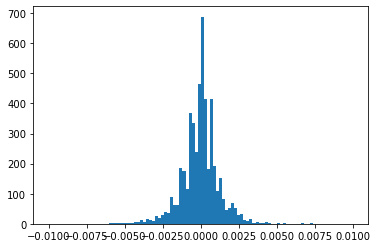

In [12]:
plt.hist(target, range=(-0.01, 0.01), bins=100);

In [13]:
target2 = [lib.highlow(i,PIP) for i in target]
target3 = [lib.highlow2(i,PIP) for i in target]
target4 = [lib.highlow3(i,PIP) for i in target]

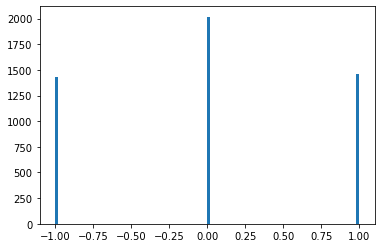

In [14]:
plt.hist(target2, range=(-1, 1), bins=100);

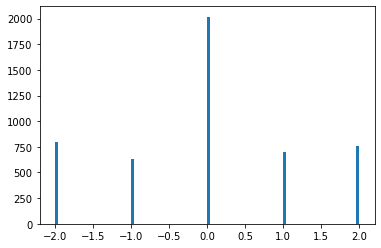

In [15]:
plt.hist(target3, range=(-2, 2), bins=100);

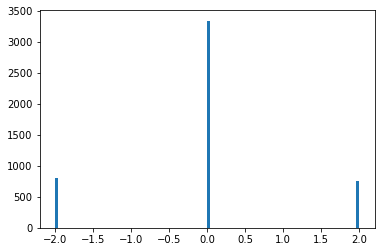

In [16]:
plt.hist(target4, range=(-2, 2), bins=100);

# データ成型は終了

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

## 多層パーセプトロンで予測を行う

In [19]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5519348268839104
[[ 91  65   4]
 [ 55 124  22]
 [ 11  63  56]]


In [20]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.4439918533604888
[[ 54   5  27   1   0]
 [ 21   8  44   0   0]
 [ 38  25 130   7   1]
 [  3   3  46   7   5]
 [  1   0  39   7  19]]


In [21]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=300, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.71
[[ 22  35   0]
 [ 19 183  10]
 [  0  23   8]]


0.003652617246605581
[[ 1.         -0.06452858]
 [-0.06452858  1.        ]]


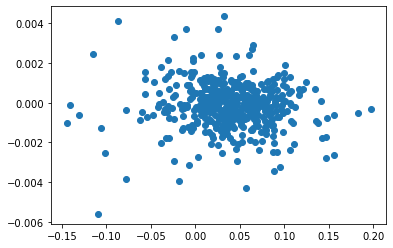

In [22]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

0.0010768716064760507
[[1.         0.00774647]
 [0.00774647 1.        ]]


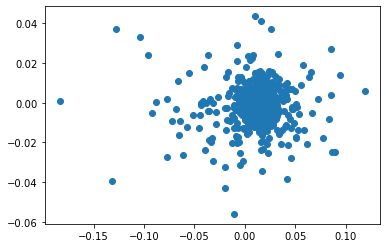

In [23]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

2802814.1579009513
[[1.         0.11974713]
 [0.11974713 1.        ]]


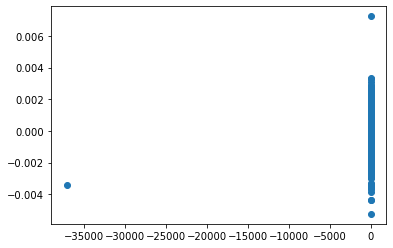

In [24]:
clf = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## サポートベクターマシンで予測を行う

In [25]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.4847250509164969
[[ 77  77   6]
 [ 46 128  27]
 [  9  88  33]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.3604887983706721
[[ 35  22  25   3   2]
 [ 12  19  38   2   2]
 [ 18  57 115   2   9]
 [  5  19  36   1   3]
 [  1  15  42   1   7]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.37067209775967414
[[ 74   9   4]
 [200  62  76]
 [  9  11  46]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## ランダムフォレストで予測を行う

In [28]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.604887983706721
[[ 67  76  17]
 [ 15 167  19]
 [  9  58  63]]


In [29]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.49490835030549896
[[ 24   0  55   1   7]
 [  7   1  61   2   2]
 [ 10   0 186   0   5]
 [  1   0  55   0   8]
 [  0   0  32   2  32]]


In [30]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.7087576374745418
[[  9  77   1]
 [  6 331   1]
 [  0  58   8]]


6.878414015918883e-07
[[1.        0.7708844]
 [0.7708844 1.       ]]


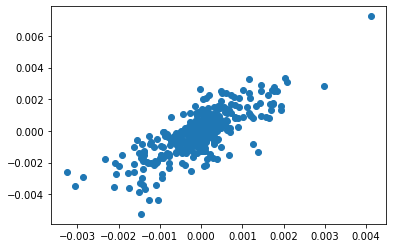

In [31]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

6.991837710726533e-05
[[1.         0.76742766]
 [0.76742766 1.        ]]


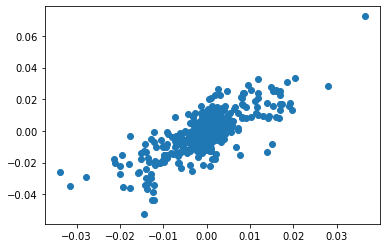

In [32]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## Adaboostで予測を行う

In [33]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5641547861507128
[[ 70  76  14]
 [ 29 145  27]
 [ 14  54  62]]


In [34]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.48065173116089616
[[ 36  13  26   2  10]
 [ 17   3  47   3   3]
 [ 19   4 154  17   7]
 [  2   1  42   8  11]
 [  4   0  19   8  35]]


In [35]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.7311608961303462
[[ 46  39   2]
 [ 40 291   7]
 [  3  41  22]]


3.7831807478328326e-05
[[1.         0.88990151]
 [0.88990151 1.        ]]


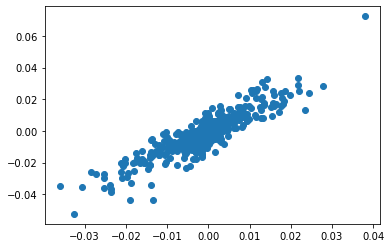

In [36]:
clf = GradientBoostingRegressor(random_state=1, n_estimators=100, max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)